### Run the code cell by cell to interact with the UI
Author: Sebastian Bélanger Villanueva 

# 0. Imports

In [1]:
%load_ext autoreload
%autoreload 2

# 1. Orbital Population Data

## 1.1 Extraction from DISCOSweb

In [1]:
from src.interactive_ui import show_discos_ui
show_discos_ui()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from src.interactive_ui import discos_df
discos_df.head()

,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,...,relationships.destinationOrbits.links.related,relationships.states.links.self,relationships.states.links.related,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self
0,object,1,1957-001A,NaN,1.0,Sputnik (8K71PS) Blok-A,Rocket Body,3964.32,Cyl,NaN,...,/api/objects/1/destination-orbits,/api/objects/1/relationships/states,/api/objects/1/states,/api/objects/1/relationships/operators,/api/objects/1/operators,/api/objects/1/relationships/tags,/api/objects/1/tags,/api/objects/1/relationships/constellations,/api/objects/1/constellations,/api/objects/1
1,object,2,1957-001B,NaN,2.0,Sputnik 1,Payload,82.85,Sphere,0.58,...,/api/objects/2/destination-orbits,/api/objects/2/relationships/states,/api/objects/2/states,/api/objects/2/relationships/operators,/api/objects/2/operators,/api/objects/2/relationships/tags,/api/objects/2/tags,/api/objects/2/relationships/constellations,/api/objects/2/constellations,/api/objects/2
2,object,3,1957-002A,NaN,3.0,Sputnik 2,Payload,503.77,Cone + Cyl,NaN,...,/api/objects/3/destination-orbits,/api/objects/3/relationships/states,/api/objects/3/states,/api/objects/3/relationships/operators,/api/objects/3/operators,/api/objects/3/relationships/tags,/api/objects/3/tags,/api/objects/3/relationships/constellations,/api/objects/3/constellations,/api/objects/3
3,object,4,1958-001A,NaN,4.0,Explorer 1,Payload,13.88,Cyl,NaN,...,/api/objects/4/destination-orbits,/api/objects/4/relationships/states,/api/objects/4/states,/api/objects/4/relationships/operators,/api/objects/4/operators,/api/objects/4/relationships/tags,/api/objects/4/tags,/api/objects/4/relationships/constellations,/api/objects/4/constellations,/api/objects/4
4,object,5,1958-002B,NaN,5.0,Vanguard 1,Payload,1.46,Sphere,NaN,...,/api/objects/5/destination-orbits,/api/objects/5/relationships/states,/api/objects/5/states,/api/objects/5/relationships/operators,/api/objects/5/operators,/api/objects/5/relationships/tags,/api/objects/5/tags,/api/objects/5/relationships/constellations,/api/objects/5/constellations,/api/objects/5


## 1.2 Filtering and Categorization

In [3]:
# Filtering Active Payloads
from src.filter import filter_active_payloads
df_payloads = filter_active_payloads(discos_df)

Filtering only active Payloads...
Total active Payloads: 12812


In [5]:
# Categorizing by application (EO, Comms, Nav, Other)
from src.filter import categorize_mission

df_payloads['mission_category'] = df_payloads['attributes.mission'].apply(categorize_mission)

from src.filter import categorize_relevant
relevant_cat = ['Communications', 'Navigation', 'Earth Observation']
w_cat = categorize_relevant(relevant_cat, df_payloads)

Counts (all categories):
 mission_category
Communications       11634
Others                 473
Earth Observation      452
Navigation             253
Name: count, dtype: int64

Weights (only relevant categories):
 mission_category
Communications       0.942864
Navigation           0.020504
Earth Observation    0.036632
Name: count, dtype: float64


## 1.3 Plots

/Users/sebastianbelangervillanueva/Library/CloudStorage/GoogleDrive-sebastian.belange@yahoo.fr/My Drive/MIT/Thesis/quantitative/Code 2/src/plots.py:162: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['year_bin', 'main_group', 'subtype']).size().reset_index(name='count')
/Users/sebastianbelangervillanueva/Library/CloudStorage/GoogleDrive-sebastian.belange@yahoo.fr/My Drive/MIT/Thesis/quantitative/Code 2/src/plots.py:264: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


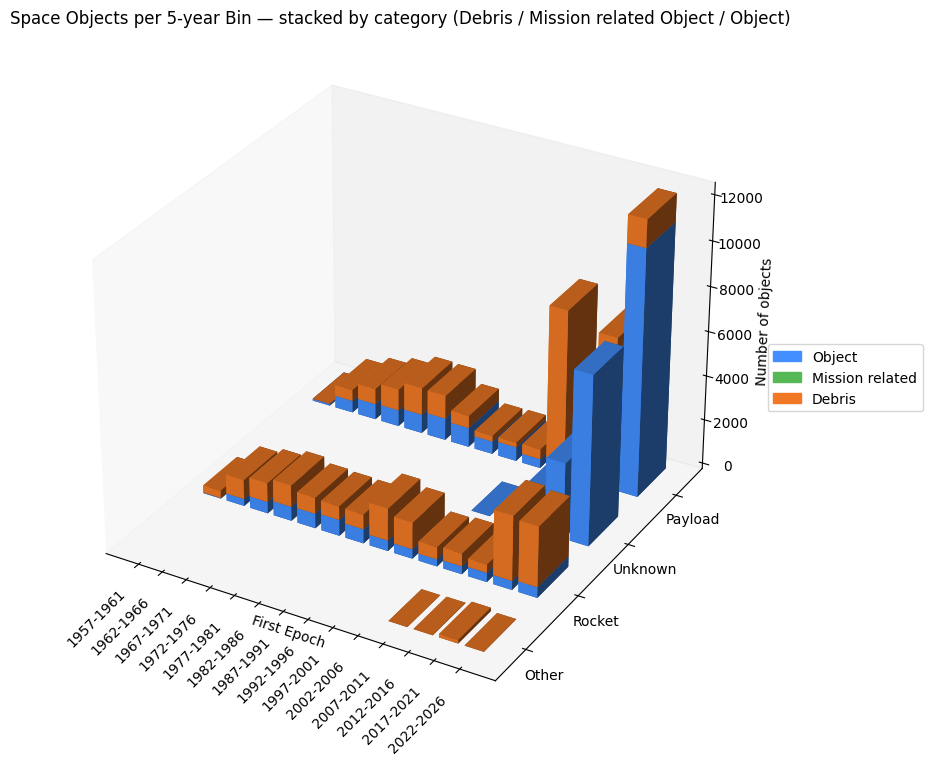

In [7]:
from src.plots import plot_launches_3d_stacked
plot_launches_3d_stacked(discos_df)

# 2. Global Economic Data

## 2.1 Global GVA Data

In [8]:
from src.macro_ui import gva_input_ui

# Launch UI
gva_values = gva_input_ui()

In [9]:
import numpy as np
#print(gva_values['Space_GVA'])
total_gva = gva_values['Space_GVA']
weights_gva = {
    "Navigation": gva_values['Wgva_Nav'],
    "Communications": gva_values['Wgva_Comms'],
    "Earth Observation": gva_values['Wgva_EO']
}

## 2.2 Design of the Value Added

### 2.2.1 Scenario Selection

In [10]:
# Import your functions
from src.gva_scenario import scenario_selector, gva_equal, gva_eo_cite
from src.citation import get_eo_paper_counts

# Call the widget
scenario_selector(
    df_payloads,
    total_gva,
    weights_gva,
    gva_equal,
    gva_eo_cite,
    get_eo_paper_counts
)

In [11]:
from src.gva_scenario import df_result
df_payloads = df_result

,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,...,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self,mission_category,citations,satellite_gva
898,object,900,1964-063C,NaN,900.0,Calsphere 1,Payload,0.99,Sphere,NaN,...,/api/objects/900/relationships/operators,/api/objects/900/operators,/api/objects/900/relationships/tags,/api/objects/900/tags,/api/objects/900/relationships/constellations,/api/objects/900/constellations,/api/objects/900,Others,0.0,0.0
900,object,902,1964-063E,NaN,902.0,Calsphere 2,Payload,9.71,Sphere,0.36,...,/api/objects/902/relationships/operators,/api/objects/902/operators,/api/objects/902/relationships/tags,/api/objects/902/tags,/api/objects/902/relationships/constellations,/api/objects/902/constellations,/api/objects/902,Others,0.0,0.0
1359,object,1361,1965-034C,NaN,1361.0,LCS 1,Payload,33.70,Sphere,1.13,...,/api/objects/1361/relationships/operators,/api/objects/1361/operators,/api/objects/1361/relationships/tags,/api/objects/1361/tags,/api/objects/1361/relationships/constellations,/api/objects/1361/constellations,/api/objects/1361,Others,0.0,0.0
1510,object,1512,1965-065E,NaN,1512.0,Tempsat 1,Payload,8.92,Sphere,0.36,...,/api/objects/1512/relationships/operators,/api/objects/1512/operators,/api/objects/1512/relationships/tags,/api/objects/1512/tags,/api/objects/1512/relationships/constellations,/api/objects/1512/constellations,/api/objects/1512,Others,0.0,0.0
1518,object,1520,1965-065H,NaN,1520.0,Calsphere 4,Payload,4.00,Sphere,0.40,...,/api/objects/1520/relationships/operators,/api/objects/1520/operators,/api/objects/1520/relationships/tags,/api/objects/1520/tags,/api/objects/1520/relationships/constellations,/api/objects/1520/constellations,/api/objects/1520,Others,0.0,0.0


In [ ]:
# Filter df_result for EO satellites
eo_result = df_result[df_result["mission_category"] == "Navigation"]

# Print satellite name and GVA
print(eo_result[["attributes.name", "satellite_gva"]])

### Scenario 1 detail

In [ ]:
from src.gva_scenario import gva_equal
df_equal = gva_equal(df_payloads,total_gva,weights_gva)
#df_equal.head()

### 2.2.2 Scenario 2 - Comms and Nav equal weight, EO depending on citation

In [ ]:
# Randomnized 
from src.gva_scenario import gva_eo_cite
df_eo_cite = gva_eo_cite(df_payloads,total_gva,weights_gva)

In [ ]:
from src.citation import get_eo_paper_counts

API_KEY = "upPSwqdNFm8pCIpraFpCs9VDNwXlZw1h3mifAAbx"   # put your real key here

raw_counts, weights = get_eo_paper_counts(
    df_payloads=df_payloads,
    api_key=API_KEY,
    limit_per_request=100,   # max papers per request
    pause_sec=1.1,           # obey 1 request/sec rule
    max_retries=3,
    plot=True                # optional: shows bar chart
)

# Optional: inspect results
print("\nRaw paper counts per EO satellite:")
for sat, count in raw_counts.items():
    print(f" - {sat}: {count} papers")

print("\nNormalized weights for EO satellites:")
for sat, w in weights.items():
    print(f" - {sat}: {w:.6f}")

In [ ]:
from src.citation import get_eo_paper_counts

api_key = "upPSwqdNFm8pCIpraFpCs9VDNwXlZw1h3mifAAbx"   # put your real key here
raw_counts_2, weights_2 = get_eo_paper_counts(df_payloads, api_key)

In [ ]:
import os
import pandas as pd
from datetime import datetime

# Create DataFrame
df = pd.DataFrame({
    "Satellite": list(raw_counts.keys()),
    "PaperCount": list(raw_counts.values()),
    "Weight": [weights.get(sat, 0) for sat in raw_counts.keys()]
})

# Ensure 'data' folder exists
os.makedirs("data", exist_ok=True)

# Generate filename with today's date
today_str = datetime.today().strftime("%Y%m%d")
filename = f"EO_paper_count_{today_str}.csv"
filepath = os.path.join("data", filename)

# Save to CSV
df.to_csv(filepath, index=False)

print(f"CSV saved to {filepath}")

In [ ]:
import matplotlib.pyplot as plt

# Sort satellites by paper count (descending)
raw_counts_sorted = dict(sorted(raw_counts.items(), key=lambda x: x[1], reverse=True))

names = list(raw_counts_sorted.keys())
counts = list(raw_counts_sorted.values())

plt.figure(figsize=(12, 6))

bars = plt.bar(names, counts)

# Title + labels
plt.title("Research Paper Volume per EO Satellite", fontsize=16)
plt.ylabel("Number of Papers", fontsize=12)

# Make labels readable
#plt.xticks(rotation=45, ha='right')
plt.xticks([])

# Cleaner grid style
plt.grid(axis="y", alpha=0.2)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_satellite_bins(raw_counts):
    """
    Takes raw_counts {satellite: paper_count} and plots how many satellites
    fall into bins of 0–100, 100–200, … up to 900–1000.
    """
    # Define bins
    bins = list(range(0, 1100, 100))  # 0,100,...,1000
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

    # Get counts per bin
    values = list(raw_counts.values())
    hist, _ = np.histogram(values, bins=bins)

    # Plot
    plt.figure(figsize=(10,5))
    plt.bar(labels, hist, width=0.8, color="skyblue", edgecolor="black")
    plt.xticks(rotation=45)
    plt.xlabel("Paper count range")
    plt.ylabel("Number of satellites")
    plt.title("Distribution of EO satellites by paper count range")
    plt.tight_layout()
    plt.show()

# Example usage after you have raw_counts from get_eo_paper_counts:
plot_satellite_bins(raw_counts)

### 2.2.3 Plots

In [ ]:
from src.plots import plot_satellite_weights
plot_satellite_weights(df_equal)
plot_satellite_weights(df_eo_cite)

# 3. Conjunction Data Messages

## 3.1 Import CDM information

In [12]:
from src.cdm_loader_ui import show_cdm_ui

# Display UI
show_cdm_ui()

In [13]:
from src.cdm_loader_ui import cdm_df
cdm_df.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,59948,STARLINK-11123 [+],6.113,33461,ARIANE 5 DEB [-],6.085,2025-12-10 13:20:12.714,0.017,7.588,0.2691,0.005
1,56153,PIESAT A [+],0.336,56154,PIESAT B [+],0.336,2025-12-05 00:27:51.522,0.566,0.001,0.1130,0.001
2,56153,PIESAT A [+],0.402,56154,PIESAT B [+],0.402,2025-12-05 02:03:00.464,0.556,0.001,0.1130,0.001
3,56153,PIESAT A [+],0.468,56154,PIESAT B [+],0.468,2025-12-05 03:38:09.233,0.545,0.001,0.1130,0.001
4,56153,PIESAT A [+],0.534,56154,PIESAT B [+],0.534,2025-12-05 05:13:17.816,0.533,0.001,0.1130,0.001


In [14]:
from src.filter import remove_duplicate_cdms
cdm_df_unique = remove_duplicate_cdms(cdm_df)

Extracted 86891 unique CDMs


## 3.2 TLE Information

In [15]:
# Import TLE Information from Space-Track
from src.gp_loader_ui import show_gp_ui

# Display UI
show_gp_ui()

In [17]:
# Filter to keep only active objects and relevant fields
from src.gp_loader_ui import df_gp
df_gp.head()
from src.filter import filter_gp
df_gp_filtered = filter_gp(df_gp)
df_gp_filtered.head()

 Extracted 32294 TLEs from active objects


,OBJECT_NAME,NORAD_CAT_ID,OBJECT_TYPE,TLE_LINE1,TLE_LINE2,DECAY_DATE
0,TBA - TO BE ASSIGNED,270446,UNKNOWN,1 T0446U 25064.64482369 .05789886 6...,2 T0446 87.9628 294.9979 0023963 319.6623 40...,NaN
1,TBA - TO BE ASSIGNED,270438,UNKNOWN,1 T0438U 25336.16425113 .00002428 0...,2 T0438 88.9225 293.3161 0220221 53.5850 308...,NaN
2,TBA - TO BE ASSIGNED,270429,UNKNOWN,1 T0429U 25339.18994074 .00005562 0...,2 T0429 87.8649 229.8000 0011305 109.0280 251...,NaN
3,TBA - TO BE ASSIGNED,270425,UNKNOWN,1 T0425U 25338.23198245 .00018432 0...,2 T0425 88.4842 261.8170 0132768 126.1101 235...,NaN
4,TBA - TO BE ASSIGNED,270413,UNKNOWN,1 T0413U 25339.26483054 .00005973 0...,2 T0413 88.7477 276.6745 0146013 142.4216 218...,NaN


## 3.3 Data Coupling (CDM, TLE, Application)

In [18]:
# Include TLE information to CDMs
from src.merge_utils import merge_cdm_tle
df_merged = merge_cdm_tle(cdm_df_unique, df_gp_filtered)

#Include Application information to CDMs
from src.merge_utils import map_applications_to_cdm
df_merged = map_applications_to_cdm(df_merged, df_payloads)

 TLE information was added to 86891 unique CDMs
 Snapshot of CDM with applications and GVA:



,OBJECT_NAME_1,application_1,gva_1,OBJECT_NAME_2,application_2,gva_2,MAX_PROB
0,STARLINK-11123 [+],Communications,99.646718,ARIANE 5 DEB [-],NaN,NaN,0.26910
1,PIESAT A [+],Communications,99.646718,PIESAT B [+],Communications,99.646718,0.11300
2,FORMOSAT 7-3 [+],Earth Observation,3913.315130,STARLINK-4283 [+],Communications,99.646718,0.09756
3,STARLINK-34020 [+],Communications,99.646718,KUIPER-00050 [+],Communications,99.646718,0.08545
4,STARLINK-32361 [+],Communications,99.646718,GEOSCAN 3 (RS92S3) [+],Communications,99.646718,0.08014


## 3.4 Plot

/Users/sebastianbelangervillanueva/Library/CloudStorage/GoogleDrive-sebastian.belange@yahoo.fr/My Drive/MIT/Thesis/quantitative/Code 2/src/plots.py:308: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stack_counts = df.groupby(['orbit_bin', 'app_simple']).size().unstack(fill_value=0)


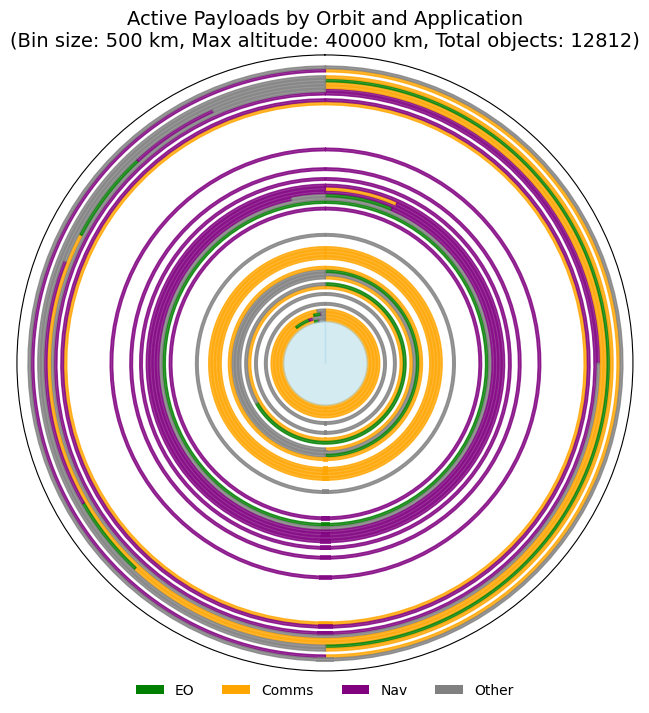

/Users/sebastianbelangervillanueva/Library/CloudStorage/GoogleDrive-sebastian.belange@yahoo.fr/My Drive/MIT/Thesis/quantitative/Code 2/src/plots.py:308: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stack_counts = df.groupby(['orbit_bin', 'app_simple']).size().unstack(fill_value=0)


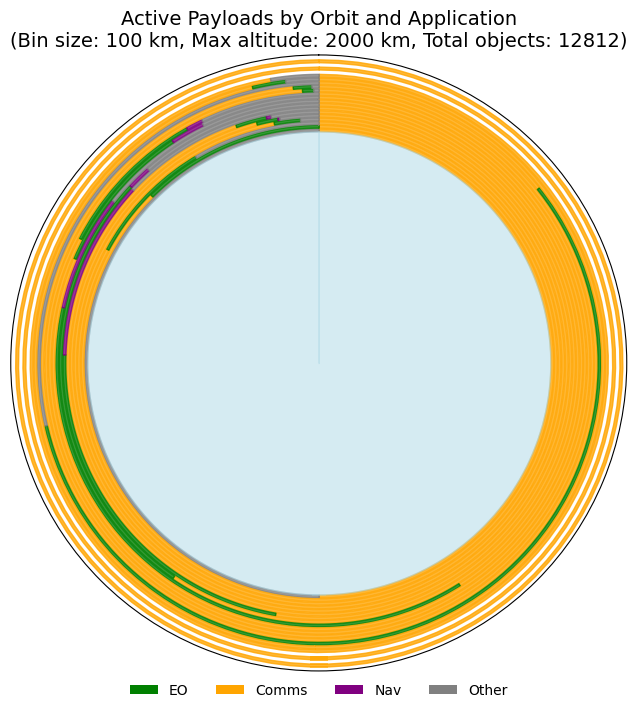

In [19]:
import pandas as pd
from sgp4.api import Satrec, jday
import matplotlib.pyplot as plt

# merge Payload and tle
from src.merge_utils import merge_payloads_with_tle
df_payload_with_tle = merge_payloads_with_tle(df_payloads, df_gp_filtered)

#Compute Altitude
from src.collision import tle_to_altitude
df_payload_with_tle['ALTITUDE_KM'] = df_payload_with_tle.apply(
    lambda row: tle_to_altitude(row['TLE_LINE1'], row['TLE_LINE2']),
    axis=1
)

from src.plots import plot_payload_orbits
plot_payload_orbits(df_payload_with_tle, bin_size=500, max_alt=40000)
plot_payload_orbits(df_payload_with_tle, bin_size=100, max_alt=2000)


## 3.5 Examples

In [20]:
#df_payload_with_tle[df_payload_with_tle["attributes.name"] == "Sentinel-2A"]
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    display(df_payload_with_tle[df_payload_with_tle["attributes.name"] == "Sentinel-2A"])
    display(df_payload_with_tle[df_payload_with_tle["attributes.name"] == "CYGNSS FM08"])
    display(df_payload_with_tle[df_payload_with_tle["attributes.name"] == "Starlink 1991"])
    display(df_payload_with_tle[df_payload_with_tle["attributes.name"] == "Starlink 33747"])
    display(df_payload_with_tle[df_payload_with_tle["attributes.name"] == "GeeSat-2 01"])
    display(df_payload_with_tle[df_payload_with_tle["attributes.name"] == "Oneweb 0507"])

,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,attributes.height,attributes.depth,attributes.diameter,attributes.span,attributes.xSectMax,attributes.xSectMin,attributes.xSectAvg,attributes.firstEpoch,attributes.mission,attributes.predDecayDate,attributes.active,attributes.cataloguedFragments,attributes.onOrbitCataloguedFragments,relationships.launch.links.self,relationships.launch.links.related,relationships.reentry.links.self,relationships.reentry.links.related,relationships.initialOrbits.links.self,relationships.initialOrbits.links.related,relationships.destinationOrbits.links.self,relationships.destinationOrbits.links.related,relationships.states.links.self,relationships.states.links.related,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self,mission_category,citations,satellite_gva,NORAD_ID,TLE_LINE1,TLE_LINE2,ALTITUDE_KM
758,object,40694,2015-028A,NaN,40697.0,Sentinel-2A,Payload,1130.0,Box + 1 Pan,1.8,3.4,1.8,NaN,12.0,21.625865,3.24,11.901467,2015-06-23,Civil Imaging,9999-12-31,True,0,0,/api/objects/40694/relationships/launch,/api/objects/40694/launch,/api/objects/40694/relationships/reentry,/api/objects/40694/reentry,/api/objects/40694/relationships/initial-orbits,/api/objects/40694/initial-orbits,/api/objects/40694/relationships/destination-orbits,/api/objects/40694/destination-orbits,/api/objects/40694/relationships/states,/api/objects/40694/states,/api/objects/40694/relationships/operators,/api/objects/40694/operators,/api/objects/40694/relationships/tags,/api/objects/40694/tags,/api/objects/40694/relationships/constellations,/api/objects/40694/constellations,/api/objects/40694,Earth Observation,1000.0,3913.31513,40697,1 40697U 15028A 25339.29860664 .00000334 00000-0 14403-3 0 9990,2 40697 98.5701 51.9373 0001036 94.1657 265.9644 14.30822881546006,800.65814


,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,attributes.height,attributes.depth,attributes.diameter,attributes.span,attributes.xSectMax,attributes.xSectMin,attributes.xSectAvg,attributes.firstEpoch,attributes.mission,attributes.predDecayDate,attributes.active,attributes.cataloguedFragments,attributes.onOrbitCataloguedFragments,relationships.launch.links.self,relationships.launch.links.related,relationships.reentry.links.self,relationships.reentry.links.related,relationships.initialOrbits.links.self,relationships.initialOrbits.links.related,relationships.destinationOrbits.links.self,relationships.destinationOrbits.links.related,relationships.states.links.self,relationships.states.links.related,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self,mission_category,citations,satellite_gva,NORAD_ID,TLE_LINE1,TLE_LINE2,ALTITUDE_KM
906,object,41879,2016-078E,NaN,41888.0,CYGNSS FM08,Payload,29.0,Half Hex Cyl + 2 Pan,NaN,0.27,NaN,0.64,1.7,0.860156,0.149649,0.450475,2016-12-15,Civil Earth Obs Sci,2027-07-16,True,0,0,/api/objects/41879/relationships/launch,/api/objects/41879/launch,/api/objects/41879/relationships/reentry,/api/objects/41879/reentry,/api/objects/41879/relationships/initial-orbits,/api/objects/41879/initial-orbits,/api/objects/41879/relationships/destination-orbits,/api/objects/41879/destination-orbits,/api/objects/41879/relationships/states,/api/objects/41879/states,/api/objects/41879/relationships/operators,/api/objects/41879/operators,/api/objects/41879/relationships/tags,/api/objects/41879/tags,/api/objects/41879/relationships/constellations,/api/objects/41879/constellations,/api/objects/41879,Earth Observation,661.0,2586.701301,41888,1 41888U 16078E 25339.31210133 .00033462 00000-0 59708-3 0 9997,2 41888 34.9459 81.1133 0010737 129.6344 230.5327 15.48979446498784,419.068675


,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,attributes.height,attributes.depth,attributes.diameter,attributes.span,attributes.xSectMax,attributes.xSectMin,attributes.xSectAvg,attributes.firstEpoch,attributes.mission,attributes.predDecayDate,attributes.active,attributes.cataloguedFragments,attributes.onOrbitCataloguedFragments,relationships.launch.links.self,relationships.launch.links.related,relationships.reentry.links.self,relationships.reentry.links.related,relationships.initialOrbits.links.self,relationships.initialOrbits.links.related,relationships.destinationOrbits.links.self,relationships.destinationOrbits.links.related,relationships.states.links.self,relationships.states.links.related,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self,mission_category,citations,satellite_gva,NORAD_ID,TLE_LINE1,TLE_LINE2,ALTITUDE_KM
2035,object,66065,2021-009AR,NaN,47587.0,Starlink 1991,Payload,260.0,Box + 1 Pan,3.7,0.1,1.5,NaN,8.86,23.657,0.2311,13.5615,2021-02-11,Commercial Communications,2025-11-23,True,0,0,/api/objects/66065/relationships/launch,/api/objects/66065/launch,/api/objects/66065/relationships/reentry,/api/objects/66065/reentry,/api/objects/66065/relationships/initial-orbits,/api/objects/66065/initial-orbits,/api/objects/66065/relationships/destination-orbits,/api/objects/66065/destination-orbits,/api/objects/66065/relationships/states,/api/objects/66065/states,/api/objects/66065/relationships/operators,/api/objects/66065/operators,/api/objects/66065/relationships/tags,/api/objects/66065/tags,/api/objects/66065/relationships/constellations,/api/objects/66065/constellations,/api/objects/66065,Communications,0.0,99.646718,47587,1 47587U 21009AR 25339.25747265 .00052955 00000-0 12680-2 0 9998,2 47587 53.0553 68.5010 0007626 342.4967 17.5773 15.40919971266808,456.255951


,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,attributes.height,attributes.depth,attributes.diameter,attributes.span,attributes.xSectMax,attributes.xSectMin,attributes.xSectAvg,attributes.firstEpoch,attributes.mission,attributes.predDecayDate,attributes.active,attributes.cataloguedFragments,attributes.onOrbitCataloguedFragments,relationships.launch.links.self,relationships.launch.links.related,relationships.reentry.links.self,relationships.reentry.links.related,relationships.initialOrbits.links.self,relationships.initialOrbits.links.related,relationships.destinationOrbits.links.self,relationships.destinationOrbits.links.related,relationships.states.links.self,relationships.states.links.related,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self,mission_category,citations,satellite_gva,NORAD_ID,TLE_LINE1,TLE_LINE2,ALTITUDE_KM
10688,object,104619,2025-069M,NaN,63444.0,Starlink 33747,Payload,575.0,Box + 2 Pan,4.1,0.3,4.1,NaN,29.0,98.572166,1.23,36.963867,2025-04-09,Commercial Communications,NaN,True,0,0,/api/objects/104619/relationships/launch,/api/objects/104619/launch,/api/objects/104619/relationships/reentry,/api/objects/104619/reentry,/api/objects/104619/relationships/initial-orbits,/api/objects/104619/initial-orbits,/api/objects/104619/relationships/destination-orbits,/api/objects/104619/destination-orbits,/api/objects/104619/relationships/states,/api/objects/104619/states,/api/objects/104619/relationships/operators,/api/objects/104619/operators,/api/objects/104619/relationships/tags,/api/objects/104619/tags,/api/objects/104619/relationships/constellations,/api/objects/104619/constellations,/api/objects/104619,Communications,0.0,99.646718,63444,1 63444U 25069M 25338.96556406 .00024241 00000-0 82902-3 0 9992,2 63444 53.1574 222.3483 0001055 59.3616 300.7489 15.30156175 38852,477.870062


,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,attributes.height,attributes.depth,attributes.diameter,attributes.span,attributes.xSectMax,attributes.xSectMin,attributes.xSectAvg,attributes.firstEpoch,attributes.mission,attributes.predDecayDate,attributes.active,attributes.cataloguedFragments,attributes.onOrbitCataloguedFragments,relationships.launch.links.self,relationships.launch.links.related,relationships.reentry.links.self,relationships.reentry.links.related,relationships.initialOrbits.links.self,relationships.initialOrbits.links.related,relationships.destinationOrbits.links.self,relationships.destinationOrbits.links.related,relationships.states.links.self,relationships.states.links.related,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self,mission_category,citations,satellite_gva,NORAD_ID,TLE_LINE1,TLE_LINE2,ALTITUDE_KM
7476,object,82681,2024-023A,NaN,58905.0,GeeSat-2 01,Payload,130.0,Box + 2 Pan,0.5,1.0,0.5,NaN,2.0,1.350241,0.25,0.832667,2024-02-03,Commercial Navigation,2038-12-02,True,0,0,/api/objects/82681/relationships/launch,/api/objects/82681/launch,/api/objects/82681/relationships/reentry,/api/objects/82681/reentry,/api/objects/82681/relationships/initial-orbits,/api/objects/82681/initial-orbits,/api/objects/82681/relationships/destination-orbits,/api/objects/82681/destination-orbits,/api/objects/82681/relationships/states,/api/objects/82681/states,/api/objects/82681/relationships/operators,/api/objects/82681/operators,/api/objects/82681/relationships/tags,/api/objects/82681/tags,/api/objects/82681/relationships/constellations,/api/objects/82681/constellations,/api/objects/82681,Navigation,0.0,15876.6123,58905,1 58905U 24023A 25339.26809154 .00003559 00000-0 46637-3 0 9996,2 58905 49.9920 171.7406 0006086 14.0089 346.1016 14.82461248100136,623.832456


,type,id,attributes.cosparId,attributes.vimpelId,attributes.satno,attributes.name,attributes.objectClass,attributes.mass,attributes.shape,attributes.width,attributes.height,attributes.depth,attributes.diameter,attributes.span,attributes.xSectMax,attributes.xSectMin,attributes.xSectAvg,attributes.firstEpoch,attributes.mission,attributes.predDecayDate,attributes.active,attributes.cataloguedFragments,attributes.onOrbitCataloguedFragments,relationships.launch.links.self,relationships.launch.links.related,relationships.reentry.links.self,relationships.reentry.links.related,relationships.initialOrbits.links.self,relationships.initialOrbits.links.related,relationships.destinationOrbits.links.self,relationships.destinationOrbits.links.related,relationships.states.links.self,relationships.states.links.related,relationships.operators.links.self,relationships.operators.links.related,relationships.tags.links.self,relationships.tags.links.related,relationships.constellations.links.self,relationships.constellations.links.related,links.self,mission_category,citations,satellite_gva,NORAD_ID,TLE_LINE1,TLE_LINE2,ALTITUDE_KM
4642,object,74253,2022-138N,NaN,54125.0,Oneweb 0507,Payload,148.0,Trap Box + 2 Pan,1.0,1.3,1.0,NaN,5.0,4.9885,1.3363,3.464422,2022-10-25,Commercial Communications,3295-06-27,True,0,0,/api/objects/74253/relationships/launch,/api/objects/74253/launch,/api/objects/74253/relationships/reentry,/api/objects/74253/reentry,/api/objects/74253/relationships/initial-orbits,/api/objects/74253/initial-orbits,/api/objects/74253/relationships/destination-orbits,/api/objects/74253/destination-orbits,/api/objects/74253/relationships/states,/api/objects/74253/states,/api/objects/74253/relationships/operators,/api/objects/74253/operators,/api/objects/74253/relationships/tags,/api/objects/74253/tags,/api/objects/74253/relationships/constellations,/api/objects/74253/constellations,/api/objects/74253,Communications,0.0,99.646718,54125,1 54125U 22138N 25339.25682545 .00000031 00000-0 46253-4 0 9990,2 54125 87.9188 343.5732 0002012 86.8101 273.3262 13.19723955151272,1201.826747


# 4. Risk Analysis

## 4.1 Individual Risk

In [21]:
from src.risk import analyze_assets_risk_with_orbit

assets = ["Sentinel-2A", "CYGFM08","Starlink-1991","Starlink-33747","GeeSat-2 01","ONEWEB-0507"]
df_risk = analyze_assets_risk_with_orbit(df_merged, assets)
print(df_risk)

            asset        application  num_cdms     mu_7d  Prob_7days  \
0     Sentinel-2A  Earth Observation        30  0.000034    0.000034   
1         CYGFM08  Earth Observation         5  0.000011    0.000011   
2   Starlink-1991     Communications        16  0.000407    0.000407   
3  Starlink-33747     Communications         9  0.001204    0.001204   
4     GeeSat-2 01         Navigation         7  0.000003    0.000003   
5     ONEWEB-0507     Communications         5  0.000061    0.000061   

      mu_yr   Prob_yr  Prob_yr_perc  GVA_millions  EVAR_millions  \
0  0.001770  0.001768      0.176809   3913.315130       6.919110   
1  0.000560  0.000560      0.056011   2586.701301       1.448845   
2  0.021212  0.020988      2.098843     99.646718       2.091428   
3  0.062766  0.060837      6.083696     99.646718       6.062203   
4  0.000178  0.000178      0.017827  15876.612300       2.830397   
5  0.003179  0.003174      0.317388     99.646718       0.316267   

   avg_altitude_km

## 4.2 Plot

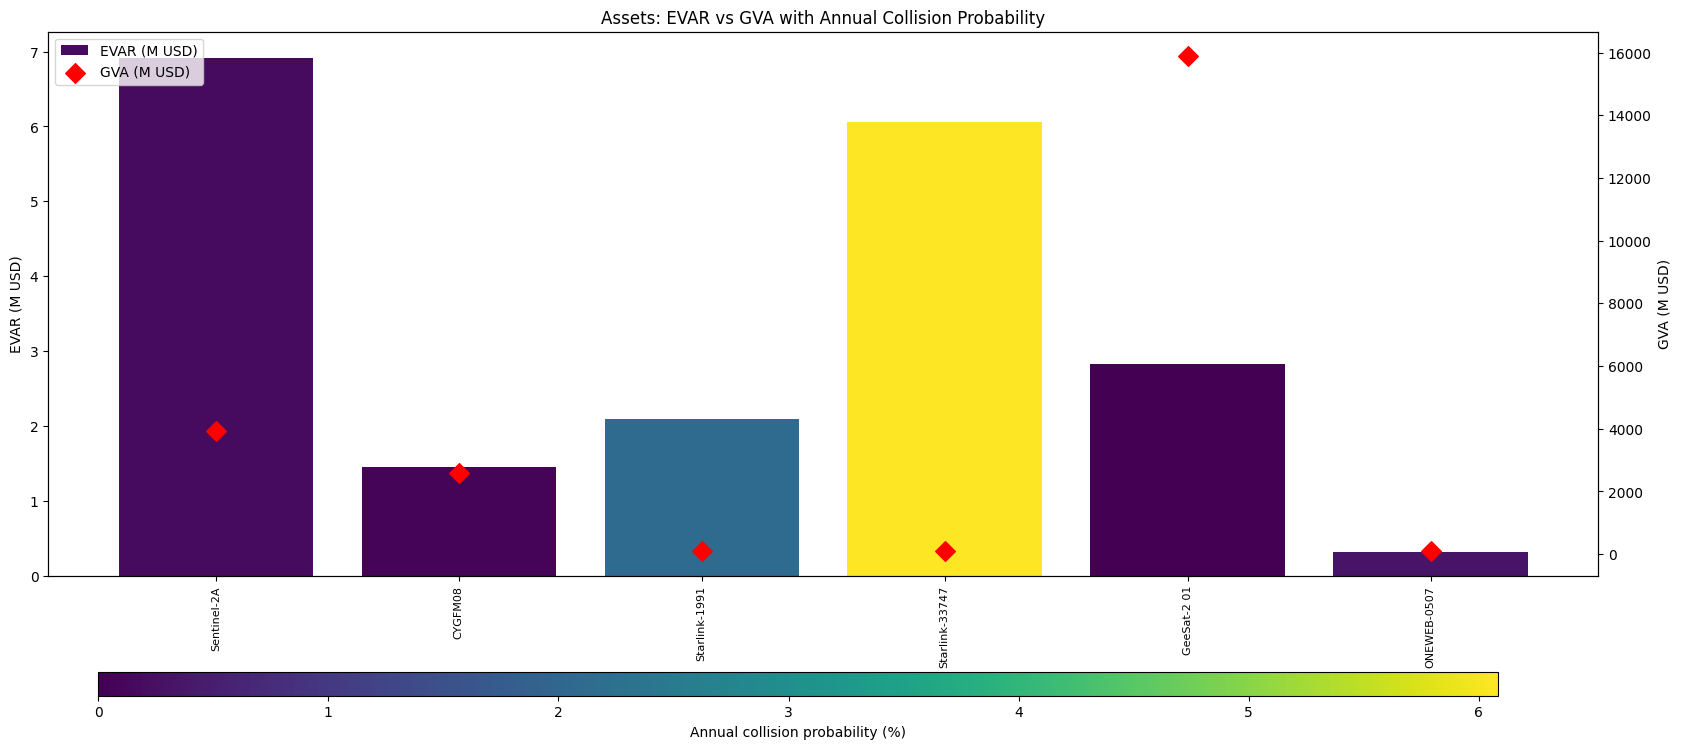

In [24]:
from src.plots import plot_evar_vs_gva
plot_evar_vs_gva(df_risk)

## 4.3 Population risk

In [25]:
from src.risk import get_objects_with_gva
objects = get_objects_with_gva(df_merged)
print(f"Number of objects with GVA: {len(objects)}")
df_risk_pop = analyze_assets_risk_with_orbit(df_merged, objects)

Number of objects with GVA: 11437


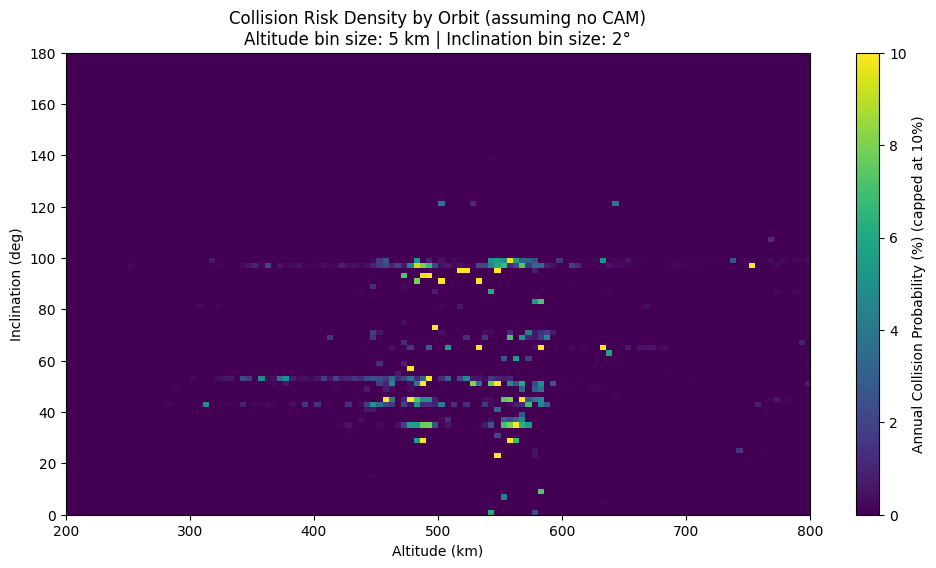

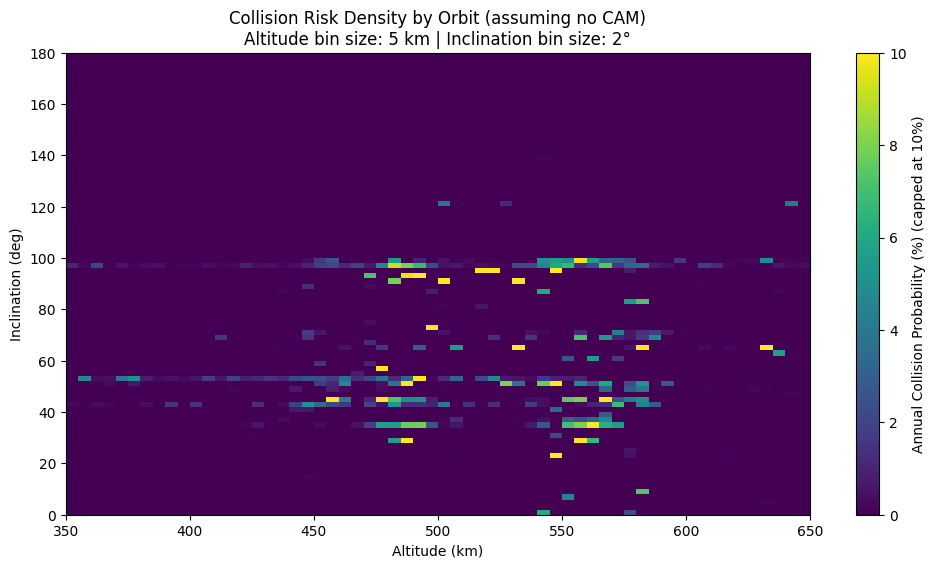

In [26]:
from src.plots import plot_risk_density_capped
plot_risk_density_capped(df_risk_pop, alt_bin_size=5, inc_bin_size=2, min_alt=200, max_alt=800, cap_prob=10)
plot_risk_density_capped(df_risk_pop, alt_bin_size=5, inc_bin_size=2, min_alt=350, max_alt=650, cap_prob=10)

In [ ]:
from src.collision import compute_conjunction_altitudes

df_coll = compute_conjunction_altitudes(df_merged)
df_coll.head()

In [ ]:
# Check first few TLEs
print(df_merged[['TLE1_1','TLE2_1','TLE1_2','TLE2_2','TCA']].head())